In [78]:
import matplotlib.pyplot as plt
import numpy as np

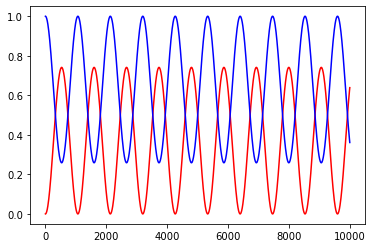

In [79]:
#Two Neutrino Case

sin_two_theta = 0.861
del_m_squared = 2.32 * 10 ** (-3) #eV^2
#energy = 

def flavour_change_prob(x):
    return (sin_two_theta ** 2) * (np.sin(1.27 * del_m_squared * x) ** 2)

def survival_prob(x):
    return 1 - flavour_change_prob(x)

x_values = np.linspace(0, 10000, 1000)
change_values = flavour_change_prob(x_values)
survive_values = survival_prob(x_values)

plt.plot(x_values, change_values, color='red')
plt.plot(x_values, survive_values, color='blue')

In [80]:
#Three Neutrino Oscillation
s_12, s_23, s_13, c_12, c_23, c_13 = 0.5599879295, 0.6429599207, 0.160182243, 0.8285007658, 0.765899824, 0.9870874576
delta_m_squared_matrix = np.array([[0, 7.59 * (10 ** (-5)), 2.32 * (10 ** (-3))], [-7.59 * (10 ** (-5)), 0, 2.32 * (10 ** (-3))], [-2.32 * (10 ** (-3)), 2.32 * (10 ** (-3)), 0]]) #all values in eV^2

def convert_flavour(flavour):
    if flavour == 'electron':
        return 0
    if flavour == 'mu':
        return 1
    if flavour == 'tau':
        return 2
    else:
        raise Exception("Sorry, that's not a valid input")
        
def PMNS_matrix(delta):
    return np.array([[(c_12 * c_13) + 0j, (s_12 * c_13) + 0j, s_13 * (np.e ** ((0 - 1j) * delta))], [(-1 * s_12 * c_23) - (c_12 * s_23 * s_13 * (np.e ** ((0 + 1j) * delta))), (c_12 * c_23) - (s_12 * s_23 * s_13 * (np.e ** ((0 + 1j) * delta))), (s_23 * c_13) + 0j], [(s_12 * s_23) - (c_12 * c_23 * s_13 * (np.e ** ((0 + 1j) * delta))), (-1 * c_12 * s_23) - (s_12 * c_23 * s_13 * (np.e ** ((0 + 1j) * delta))), (c_23 * c_13) + 0j]])
    
def three_flavour_prob(init_flavour, final_flavour, x, delta):
    mixing_matrix = PMNS_matrix(delta)
    pmns_init_row = convert_flavour(init_flavour)
    pmns_final_row = convert_flavour(final_flavour)
    result = 0
    
    #Kronecker Delta
    if init_flavour == final_flavour:
        result += 1
    
    #Sum over real parts
    i = 0
    while i < 2:
        j = i + 1
        while j <= 2:
            result -= (((4 + 0j) * mixing_matrix[pmns_init_row][i].conjugate() * mixing_matrix[pmns_final_row][j] * mixing_matrix[pmns_init_row][j] * mixing_matrix[pmns_final_row][i].conjugate()).real * (np.sin(delta_m_squared_matrix[j][i] * 1.27 * x) ** 2))
            result += (((2 + 0j) * mixing_matrix[pmns_init_row][i].conjugate() * mixing_matrix[pmns_final_row][j] * mixing_matrix[pmns_init_row][j] * mixing_matrix[pmns_final_row][i].conjugate()).imag * (np.sin(delta_m_squared_matrix[j][i] * 1.27 * x * 2)))
            j += 1
        i += 1
    
    return result

x = np.linspace(0, 35000, 1000000)
print(delta_m_squared_matrix)

[[ 0.00e+00  7.59e-05  2.32e-03]
 [-7.59e-05  0.00e+00  2.32e-03]
 [-2.32e-03  2.32e-03  0.00e+00]]


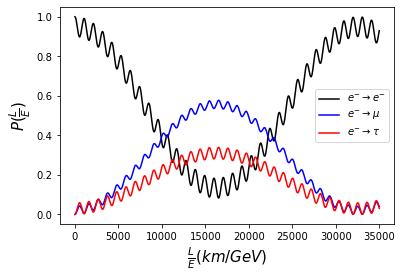

In [81]:
#Initial State : Electron
y_e = three_flavour_prob('electron', 'electron', x, 0)
y_mu = three_flavour_prob('electron', 'mu', x, 0)
y_tau = three_flavour_prob('electron', 'tau', x, 0)

plt.plot(x, y_e, color='black', label=r'$e^{-} \rightarrow e^{-}$')
plt.plot(x, y_mu, color='blue', label=r'$e^{-} \rightarrow \mu$')
plt.plot(x, y_tau, color='red', label=r'$e^{-} \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(\frac{L}{E})$', fontsize=15)
plt.legend()

/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


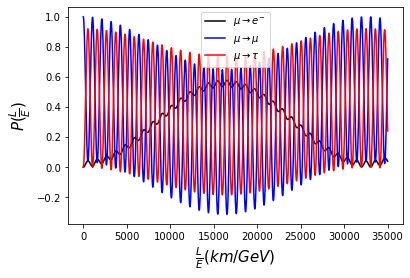

In [82]:
#Initial State : Mu
y_e = three_flavour_prob('mu', 'electron', x, 0)
y_mu = three_flavour_prob('mu', 'mu', x, 0)
y_tau = three_flavour_prob('mu', 'tau', x, 0)

plt.plot(x, y_e, color='black', label=r'$\mu \rightarrow e^{-}$')
plt.plot(x, y_mu, color='blue', label=r'$\mu \rightarrow \mu$')
plt.plot(x, y_tau, color='red', label=r'$\mu \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(\frac{L}{E})$', fontsize=15)
plt.legend()

/Users/abhayagarwal/anaconda3/envs/tflow/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


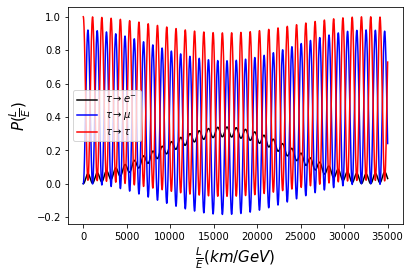

In [83]:
#Initial State : Tau
y_e = three_flavour_prob('tau', 'electron', x, 0)
y_mu = three_flavour_prob('tau', 'mu', x, 0)
y_tau = three_flavour_prob('tau', 'tau', x, 0)

plt.plot(x, y_e, color='black', label=r'$\tau \rightarrow e^{-}$')
plt.plot(x, y_mu, color='blue', label=r'$\tau \rightarrow \mu$')
plt.plot(x, y_tau, color='red', label=r'$\tau \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(\frac{L}{E})$', fontsize=15)
plt.legend()

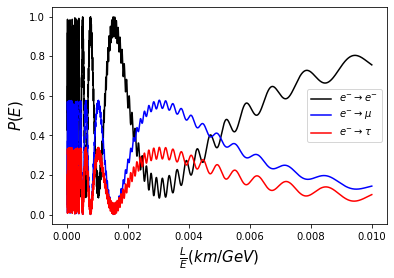

In [84]:
#Fix L = 50 km and plot probability as a function of E
l = 50 
energy = np.linspace(0.00001, 0.01, 10000)
x = l / energy
delta = 0

#Initial State : Electron
y_e = three_flavour_prob('electron', 'electron', x, delta)
y_mu = three_flavour_prob('electron', 'mu', x, delta)
y_tau = three_flavour_prob('electron', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$e^{-} \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$e^{-} \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$e^{-} \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

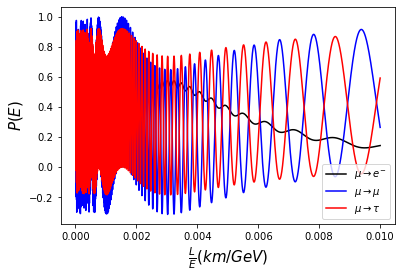

In [85]:
#Initial State : Mu
y_e = three_flavour_prob('mu', 'electron', x, delta)
y_mu = three_flavour_prob('mu', 'mu', x, delta)
y_tau = three_flavour_prob('mu', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\mu \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\mu \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\mu \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

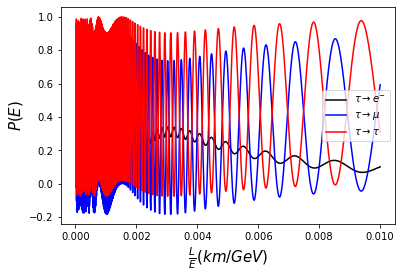

In [86]:
#Initial State : Tau
y_e = three_flavour_prob('tau', 'electron', x, delta)
y_mu = three_flavour_prob('tau', 'mu', x, delta)
y_tau = three_flavour_prob('tau', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\tau \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\tau \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\tau \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

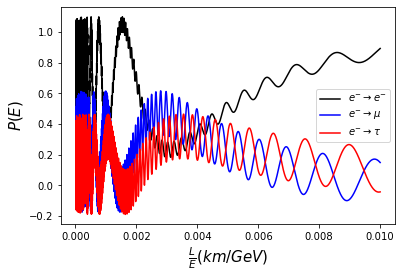

In [87]:
delta = np.pi / 2

#Initial State : Electron
y_e = three_flavour_prob('electron', 'electron', x, delta)
y_mu = three_flavour_prob('electron', 'mu', x, delta)
y_tau = three_flavour_prob('electron', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$e^{-} \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$e^{-} \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$e^{-} \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

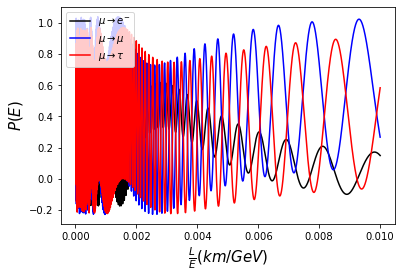

In [88]:
#Initial State : Mu
y_e = three_flavour_prob('mu', 'electron', x, delta)
y_mu = three_flavour_prob('mu', 'mu', x, delta)
y_tau = three_flavour_prob('mu', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\mu \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\mu \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\mu \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

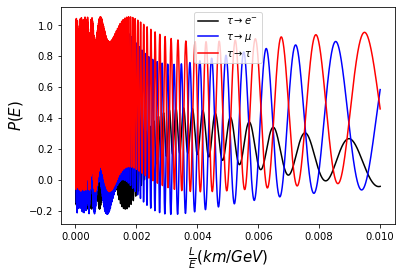

In [89]:
#Initial State : Tau
y_e = three_flavour_prob('tau', 'electron', x, delta)
y_mu = three_flavour_prob('tau', 'mu', x, delta)
y_tau = three_flavour_prob('tau', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\tau \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\tau \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\tau \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

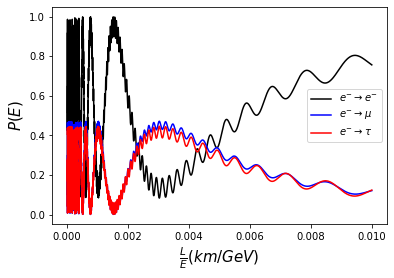

In [90]:
delta = np.pi

#Initial State : Electron
y_e = three_flavour_prob('electron', 'electron', x, delta)
y_mu = three_flavour_prob('electron', 'mu', x, delta)
y_tau = three_flavour_prob('electron', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$e^{-} \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$e^{-} \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$e^{-} \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

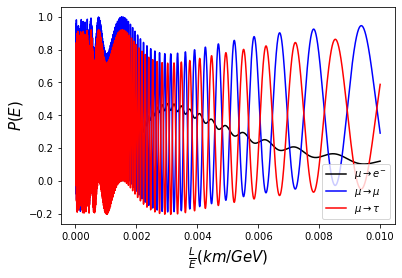

In [91]:
#Initial State : Mu
y_e = three_flavour_prob('mu', 'electron', x, delta)
y_mu = three_flavour_prob('mu', 'mu', x, delta)
y_tau = three_flavour_prob('mu', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\mu \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\mu \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\mu \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

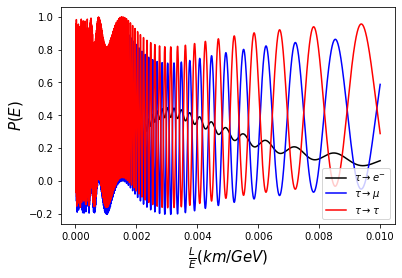

In [92]:
#Initial State : Tau
y_e = three_flavour_prob('tau', 'electron', x, delta)
y_mu = three_flavour_prob('tau', 'mu', x, delta)
y_tau = three_flavour_prob('tau', 'tau', x, delta)

plt.plot(energy, y_e, color='black', label=r'$\tau \rightarrow e^{-}$')
plt.plot(energy, y_mu, color='blue', label=r'$\tau \rightarrow \mu$')
plt.plot(energy, y_tau, color='red', label=r'$\tau \rightarrow \tau$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()

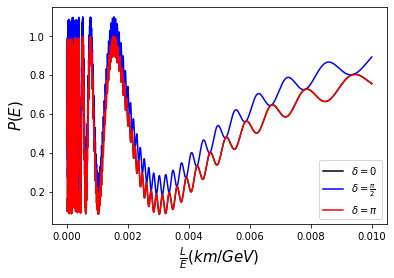

In [93]:
#Focusing on effect of different delta values
l = 50 
energy = np.linspace(0.00001, 0.01, 10000)
x = l / energy

y_e = three_flavour_prob('electron', 'electron', x, 0)
y_e_other = three_flavour_prob('electron', 'electron', x, np.pi / 2)
y_e_other_other = three_flavour_prob('electron', 'electron', x, np.pi)

plt.plot(energy, y_e, color='black', label=r'$\delta=0$')
plt.plot(energy, y_e_other, color='blue', label=r'$\delta=\frac{\pi}{2}$')
plt.plot(energy, y_e_other_other, color='red', label=r'$\delta=\pi$')
plt.xlabel(r'$\frac{L}{E} (km/GeV)$', fontsize=15)
plt.ylabel(r'$P(E)$', fontsize=15)
plt.legend()